In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

In [2]:
project_data = pd.read_csv("data.csv")
project_data = project_data.drop(columns=["id"]) # droping unwanted columns

In [3]:
project_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,sensor_id,sensor_name,sensor_data,biomarker_name,urine_biomarker_value
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),20.3
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),18.9
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),22.1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),19.5
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),45.2


In [4]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
project_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,sensor_id,sensor_data,urine_biomarker_value
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,2.367311,36.987346,29.605800
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.847773,21.069023,13.561382
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,1.000000,3.800000,4.200000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,2.000000,15.500000,19.500000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,3.000000,42.200000,31.400000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,3.000000,53.700000,41.300000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,3.000000,62.400000,55.600000


In [6]:
project_data.shape

(569, 36)

In [7]:
project_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'sensor_id', 'sensor_name',
       'sensor_data', 'biomarker_name', 'urine_biomarker_value'],
      dtype='object')

In [8]:
project_data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
sensor_id                  0
sensor_name                0
sensor_data                0
biomarker_name

diagnosis
B    357
M    212
Name: count, dtype: int64


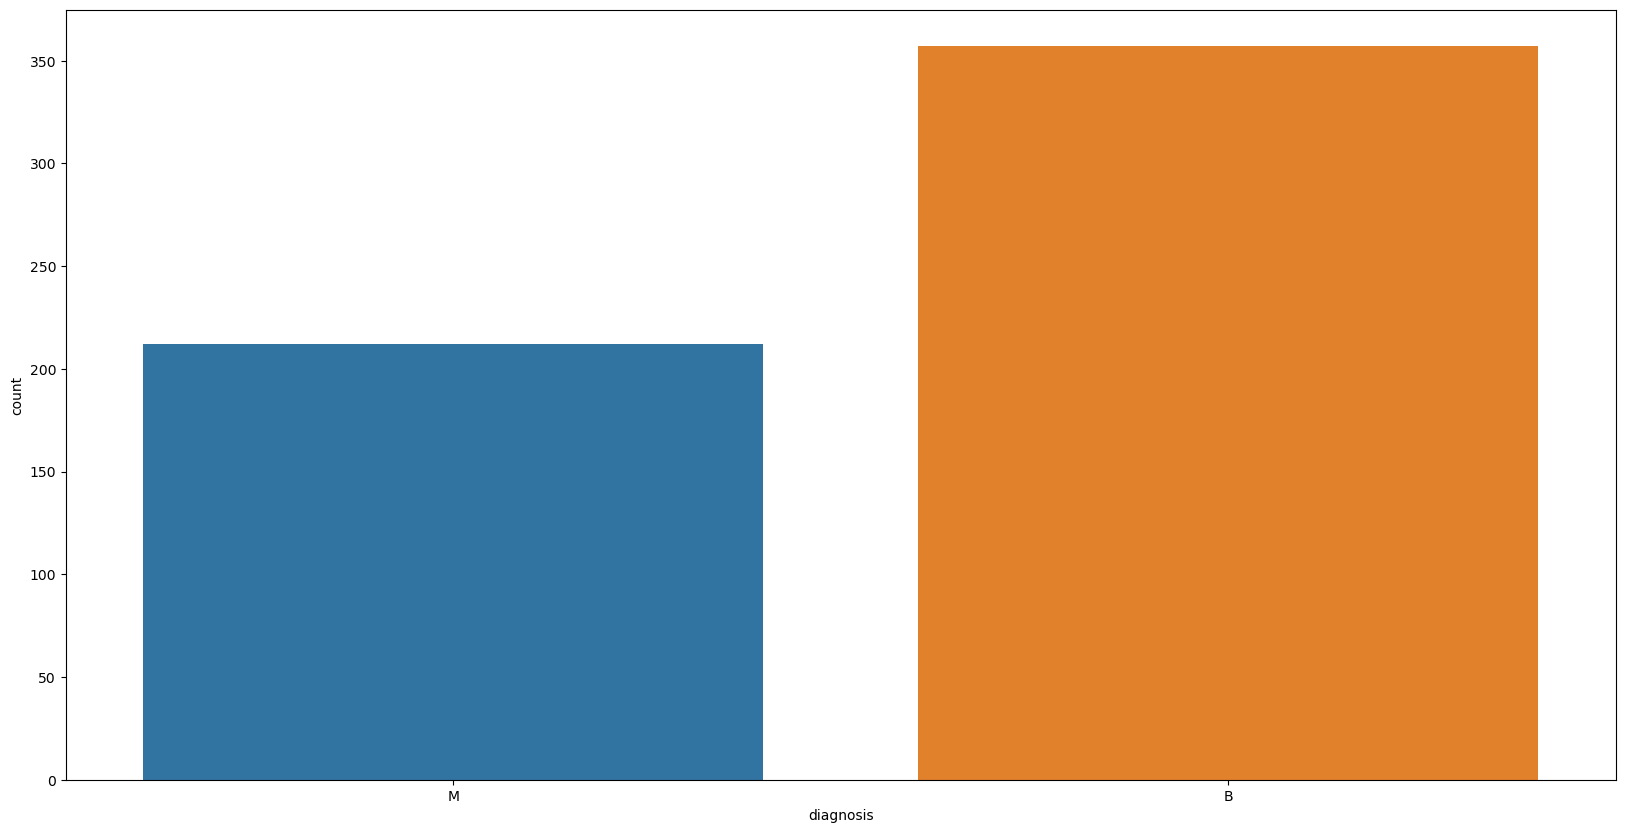

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x=project_data["diagnosis"])
print(project_data["diagnosis"].value_counts())

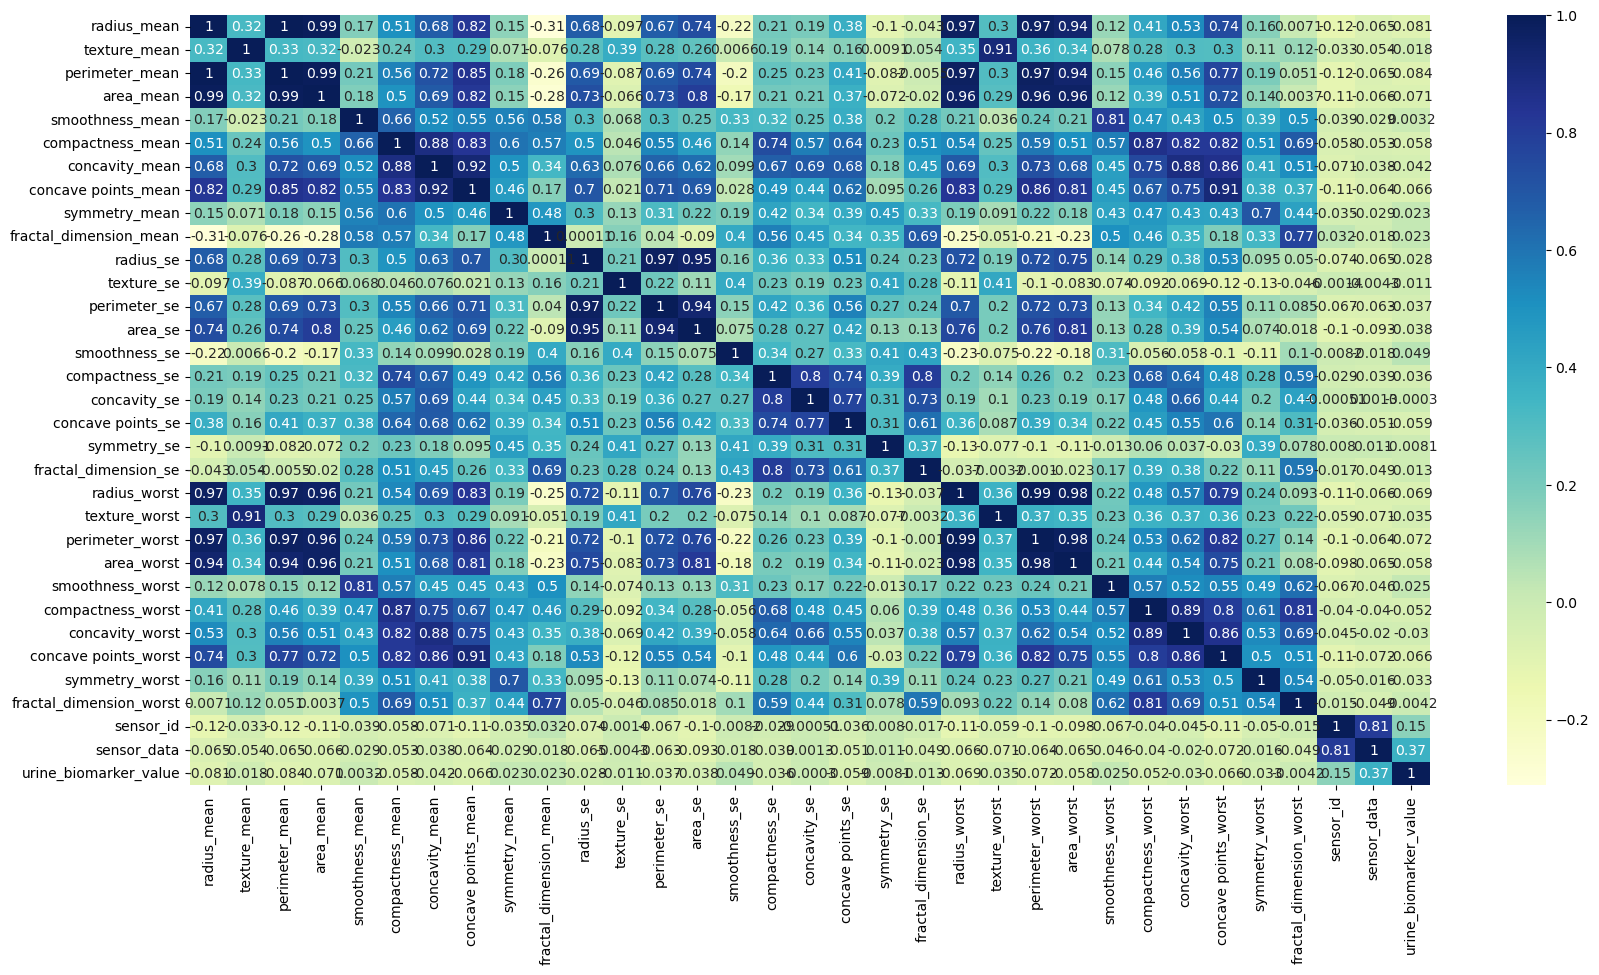

In [12]:
numeric_columns = project_data.select_dtypes(include=['float64', 'int64']).columns
corr = project_data[numeric_columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [13]:
X_train=project_data.drop(columns=["diagnosis"])
y_train=project_data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (455, 35)
Test dataset shape (455,)


In [15]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'sensor_id', 'sensor_data',
       'urine_biomarker_value'],
      dtype='object')
****************************************************************************************************
Index(['sensor_name', 'biomarker_name'], dtype='object')


In [21]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture...
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'sensor_id', 'sensor_data',
       'urine_biomarker_value'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['sensor_name', 'biomarker_name'], dtype='object'))])

In [ ]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [ ]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [ ]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [ ]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [ ]:
print(model_and_score)

In [29]:
print(model_and_score)

{'bagging classifier': '98.24175824175823%', 'KNN classifier': '94.28571428571428%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '97.8021978021978%', 'Gradientboot classifier': '100.0%', 'MLP': '94.5054945054945%'}


bagging classifier


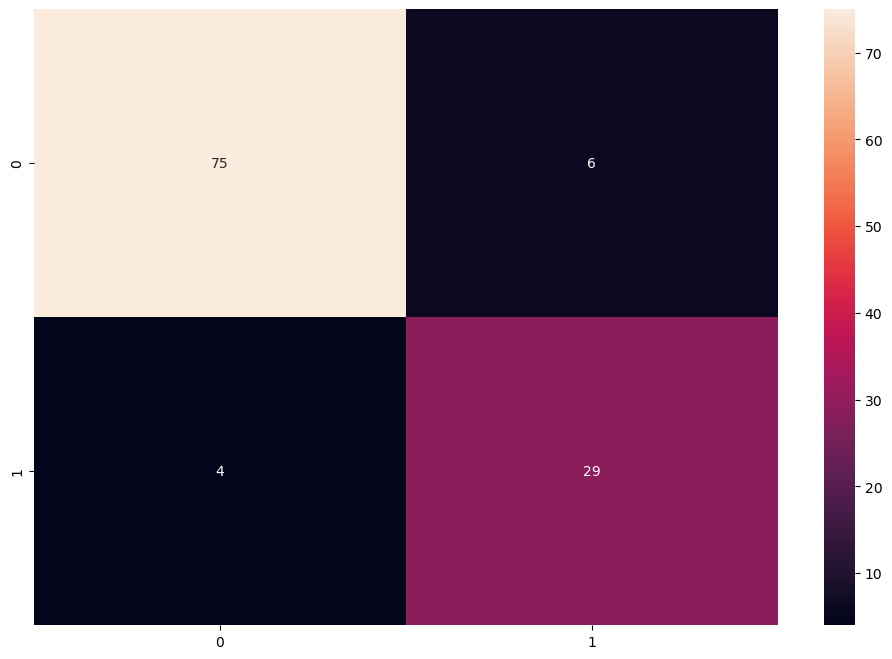

KNN classifier


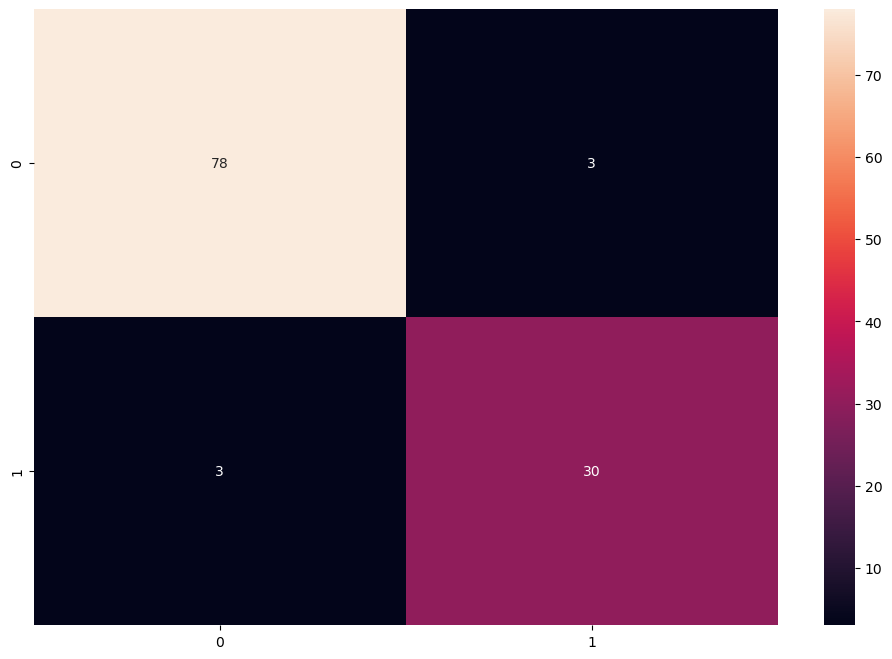

Random Forest calssifier


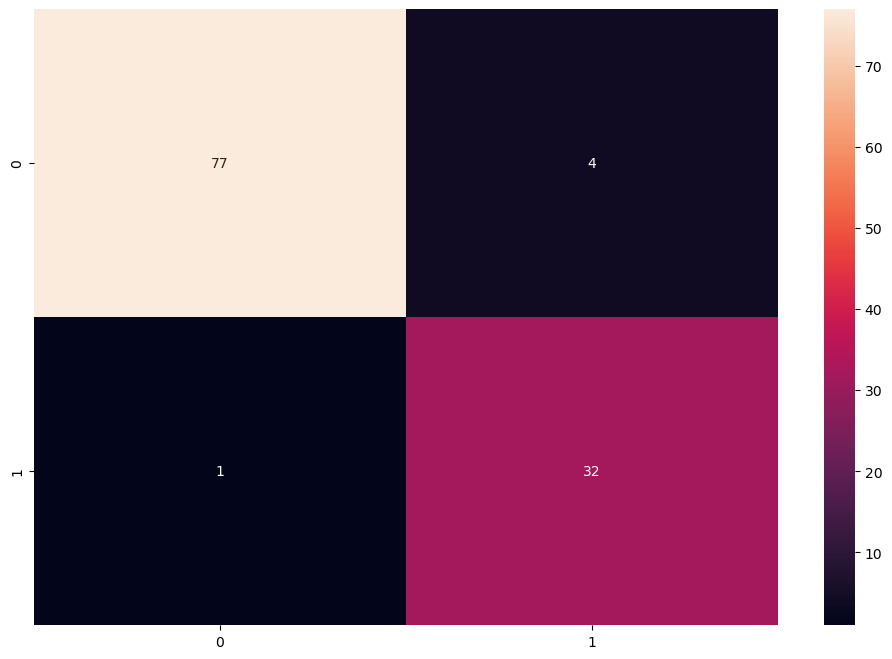

Adaboost classifier


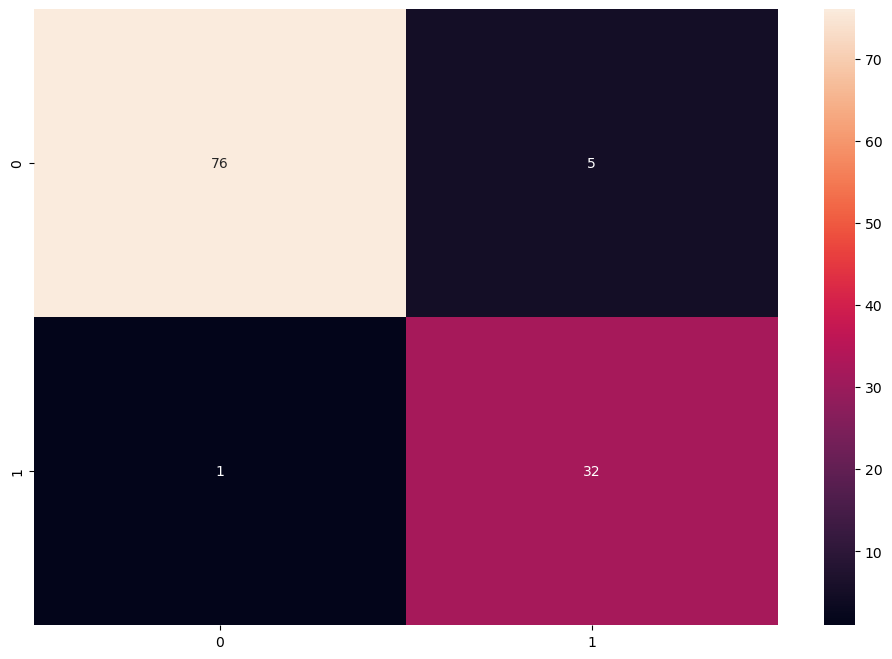

Gradientboot classifier


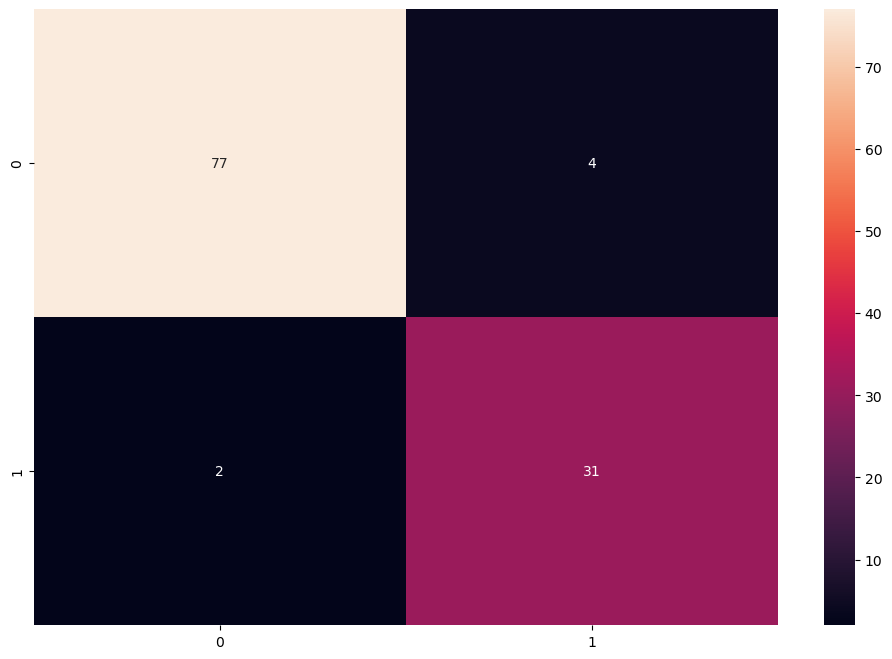

MLP


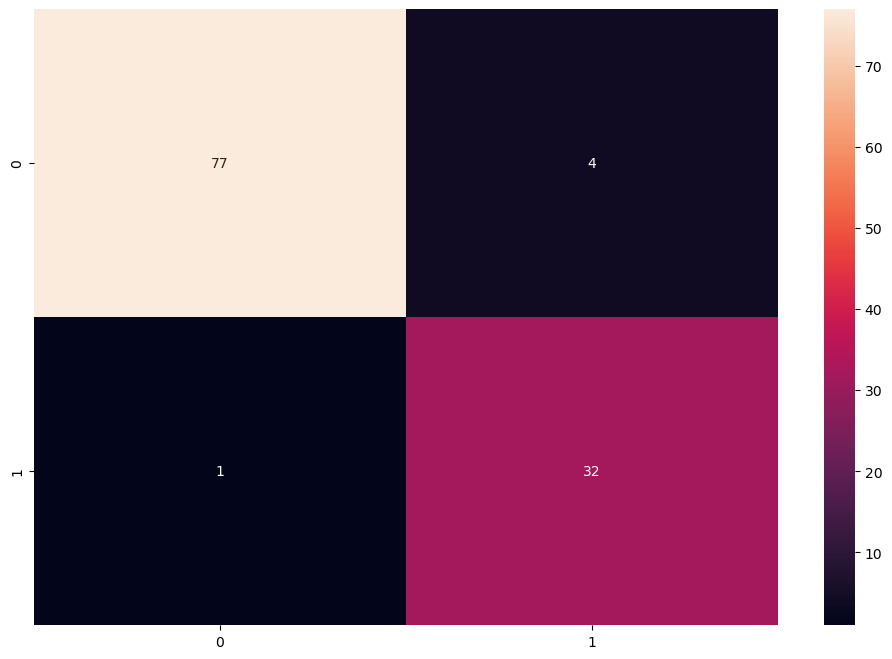

In [32]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [33]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

           B       0.95      0.93      0.94        81
           M       0.83      0.88      0.85        33

    accuracy                           0.91       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



KNN classifier Report :
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        81
           M       0.91      0.91      0.91        33

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Random Forest calssifier Report :
              precision    recall  f1-score   support

           B       0.99      0.95      0.97        81
           M       0.89      0.97      0.93        33

    accuracy                           0.96       114
   macro avg       0.94      0.96     

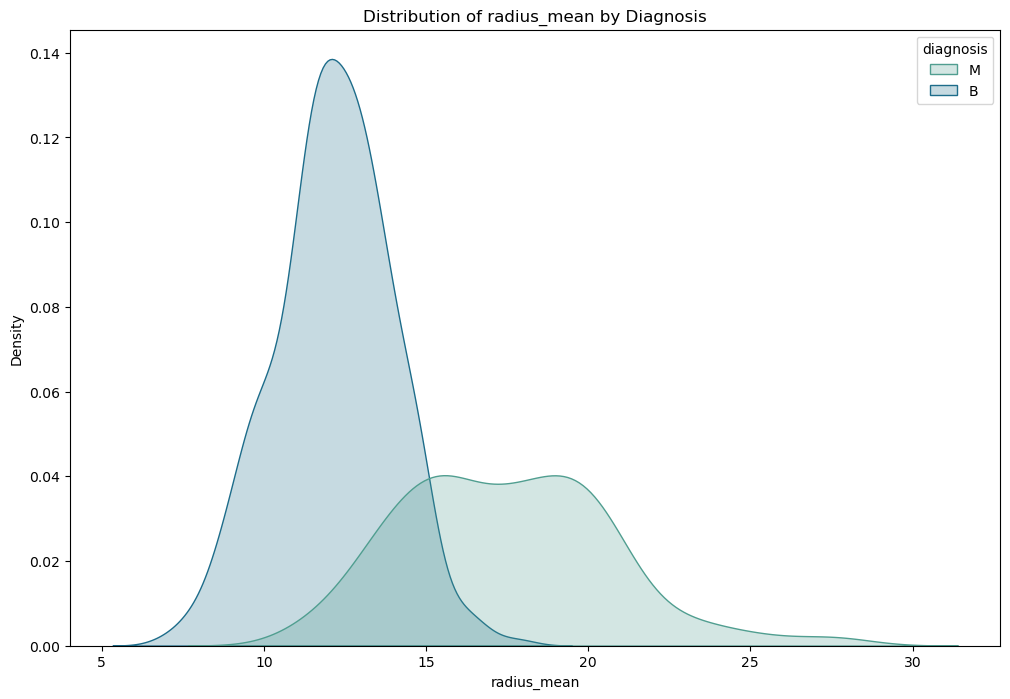

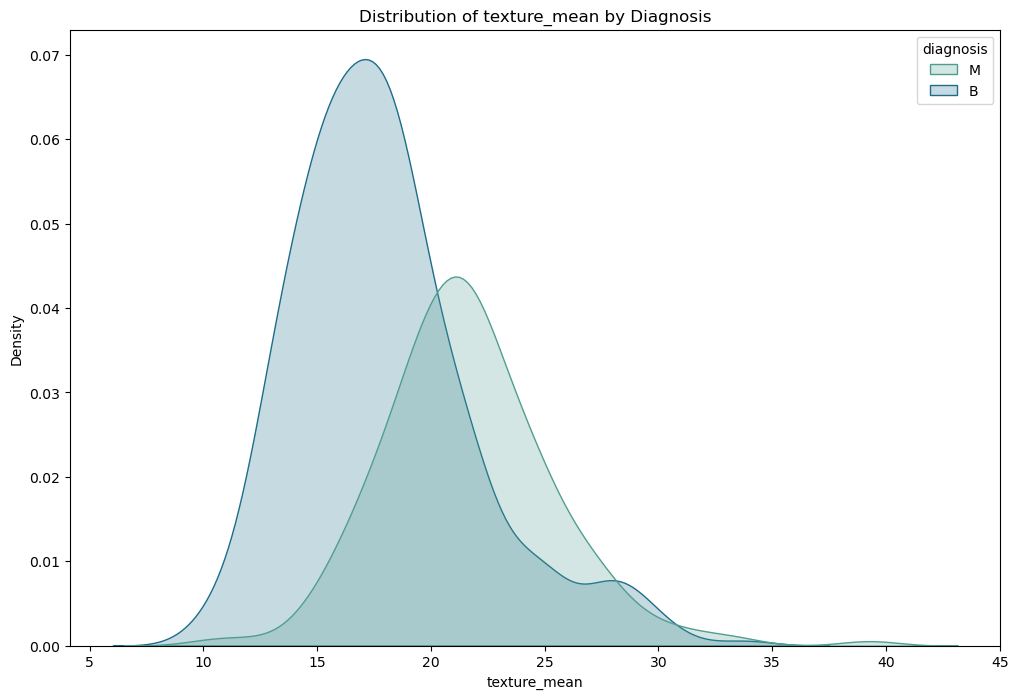

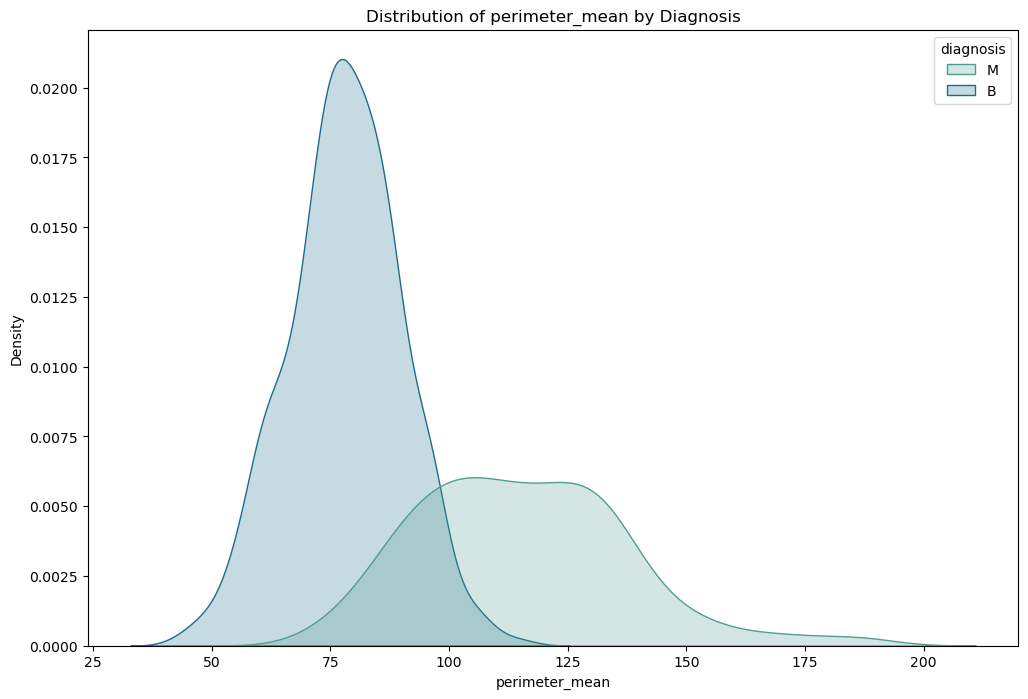

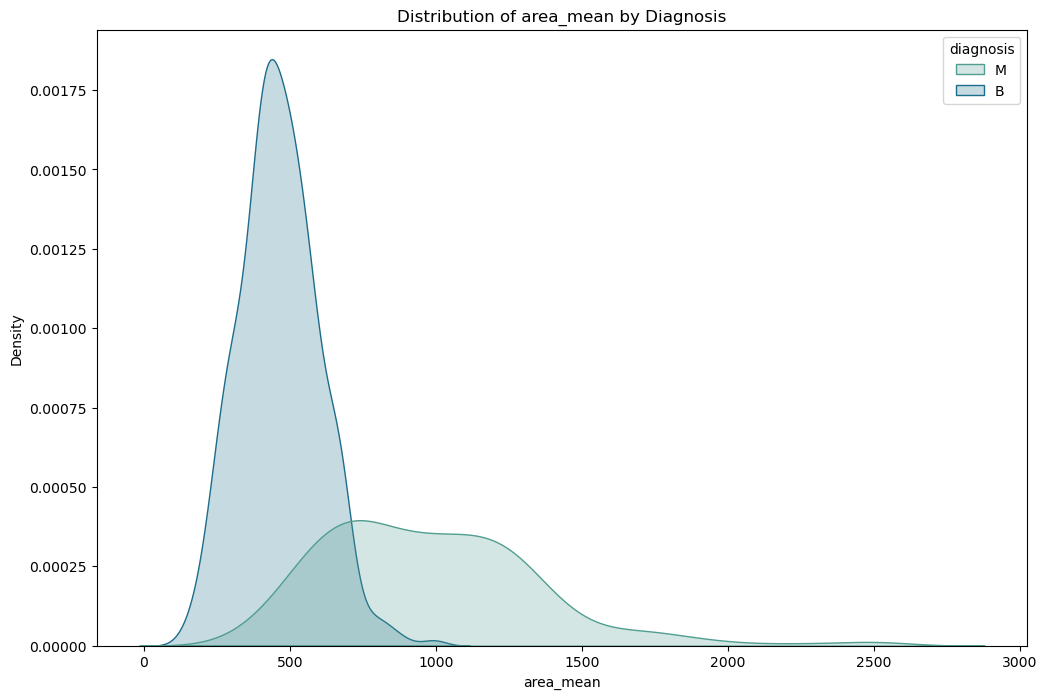

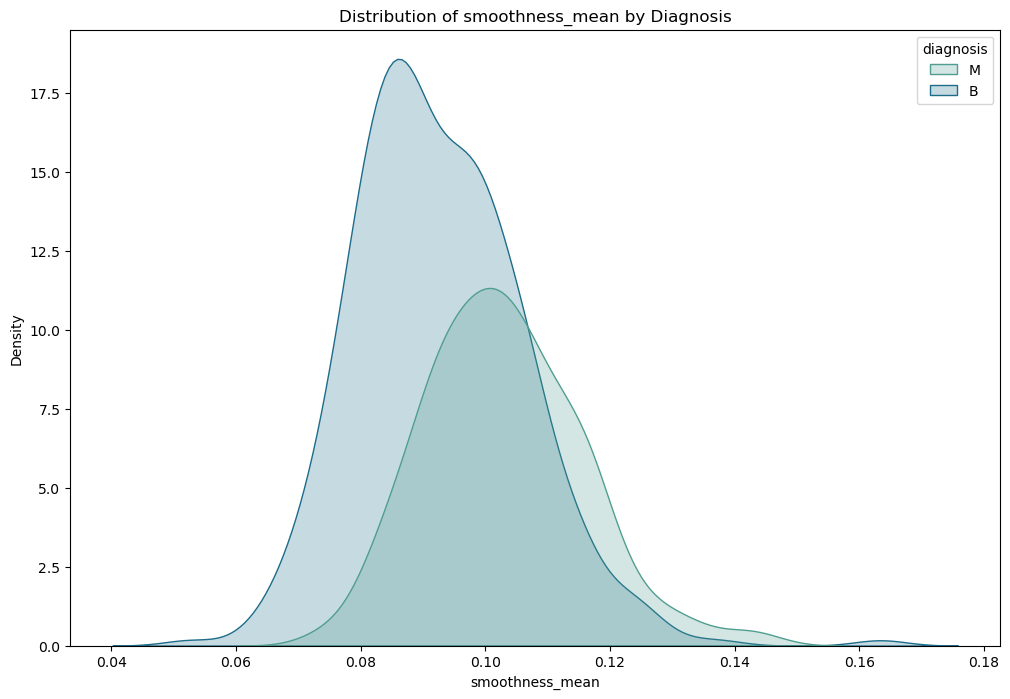

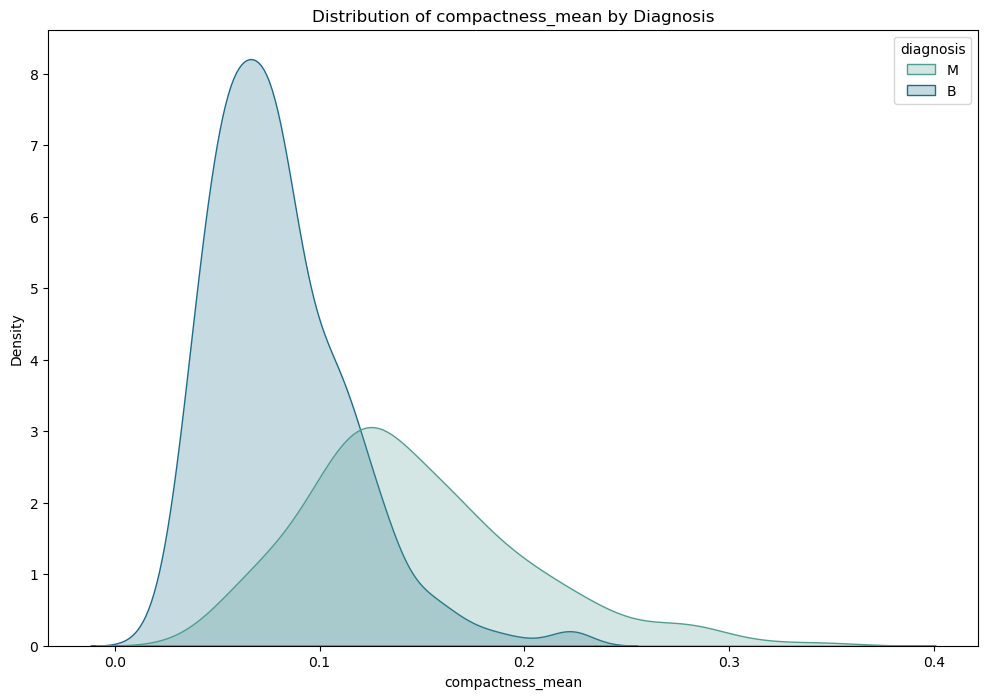

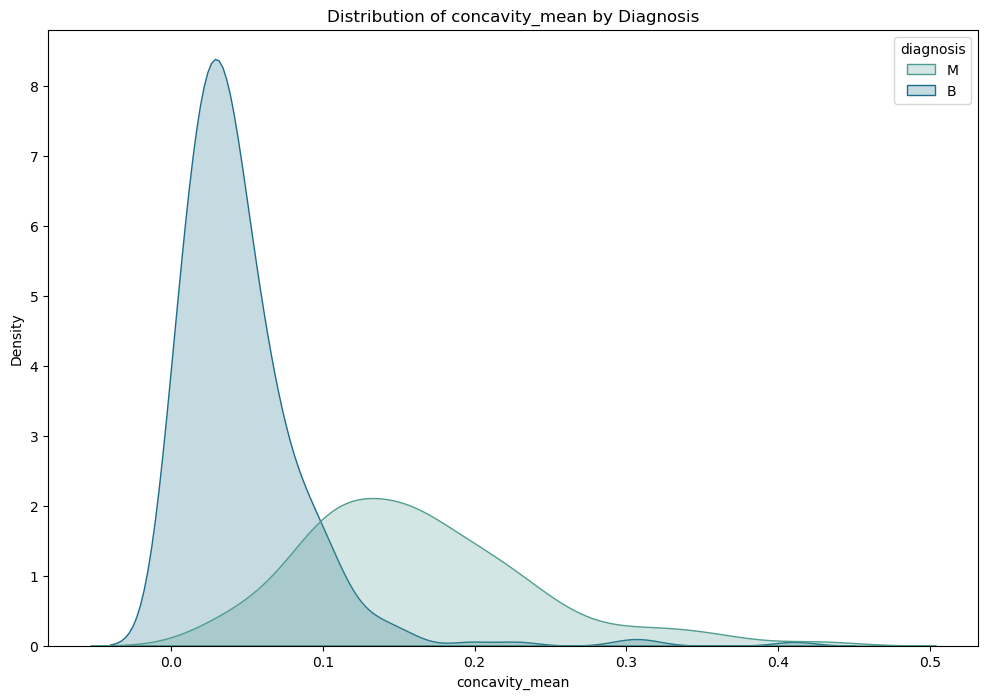

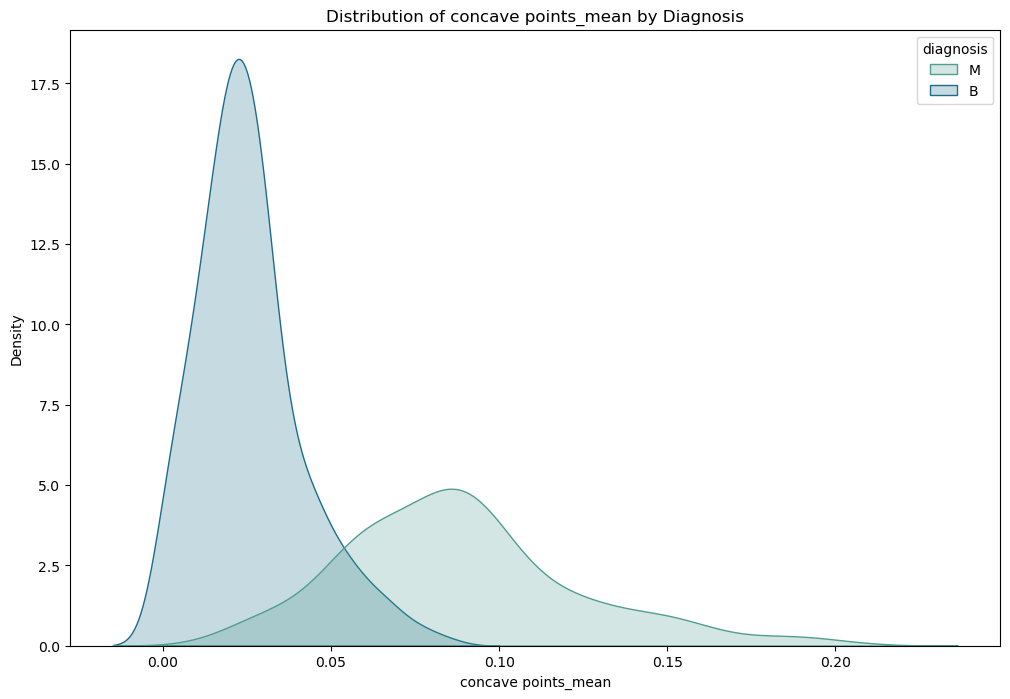

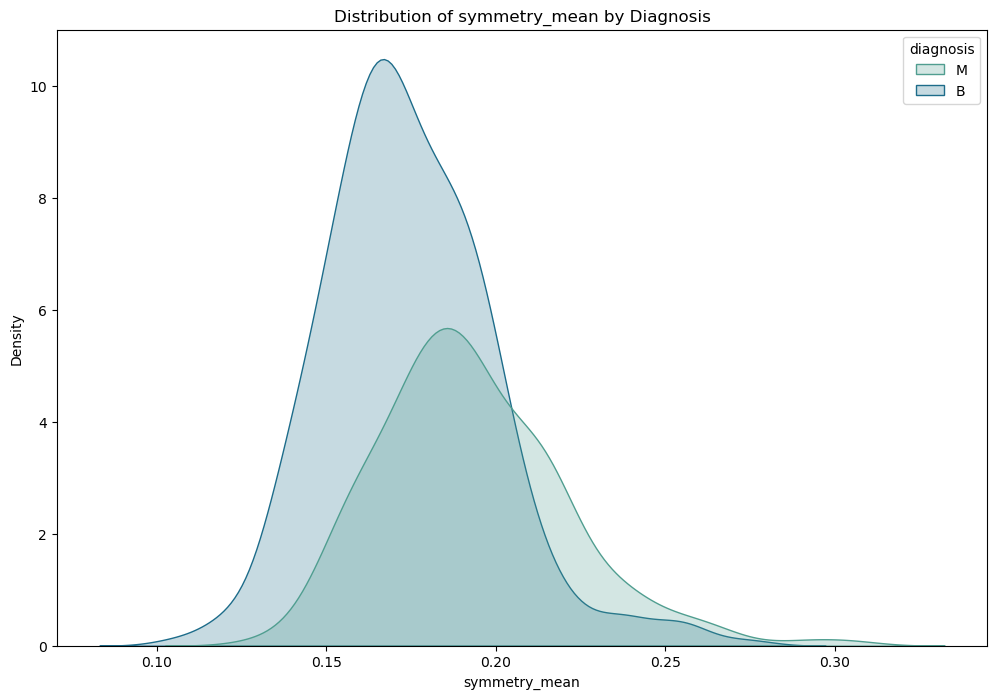

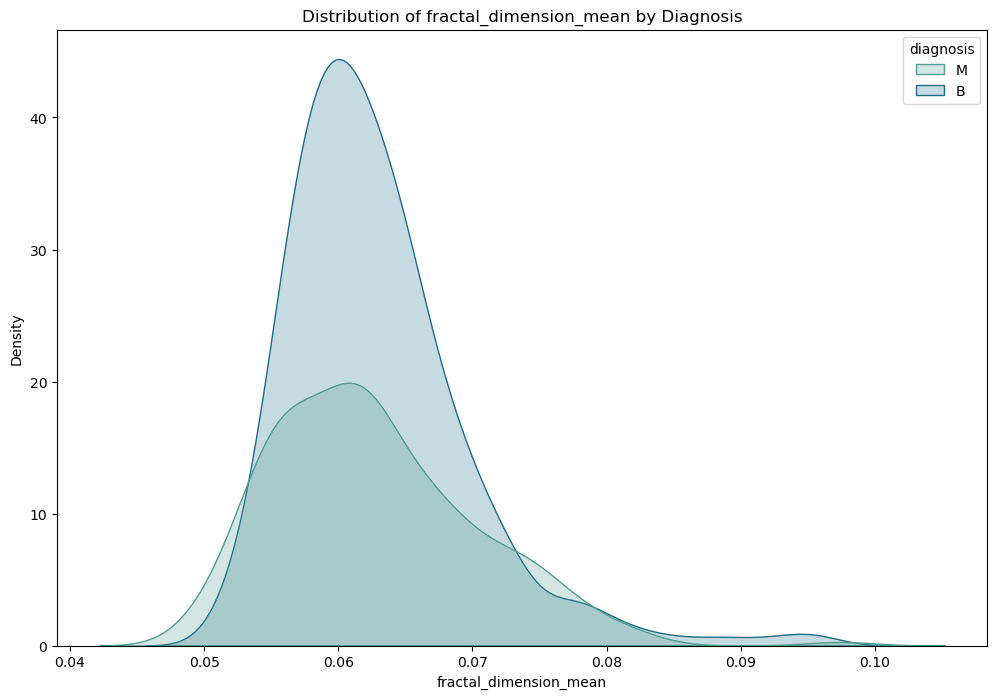

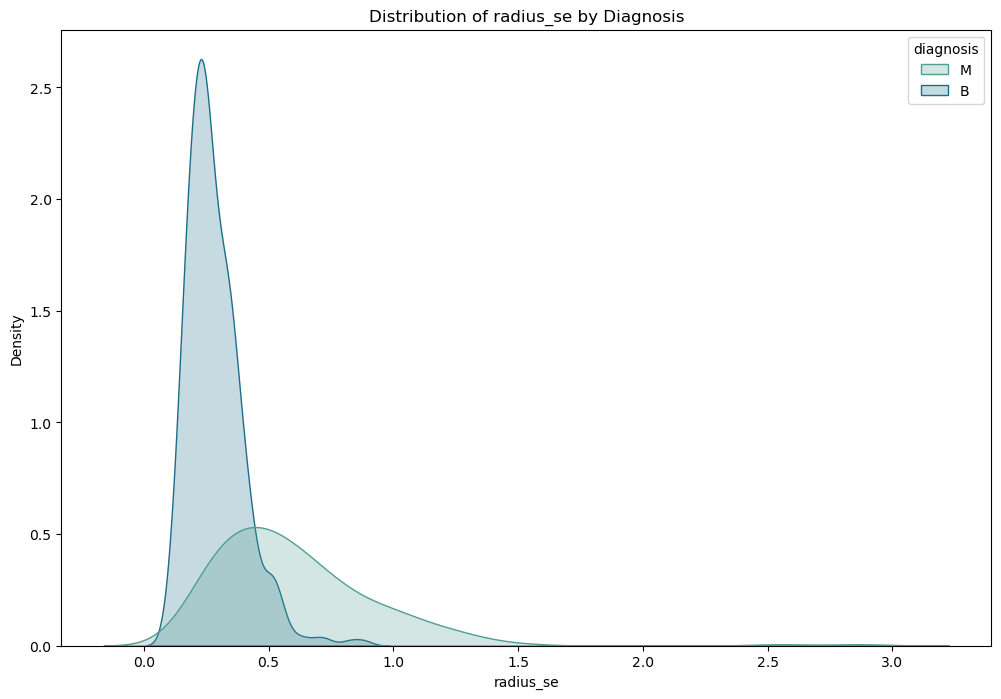

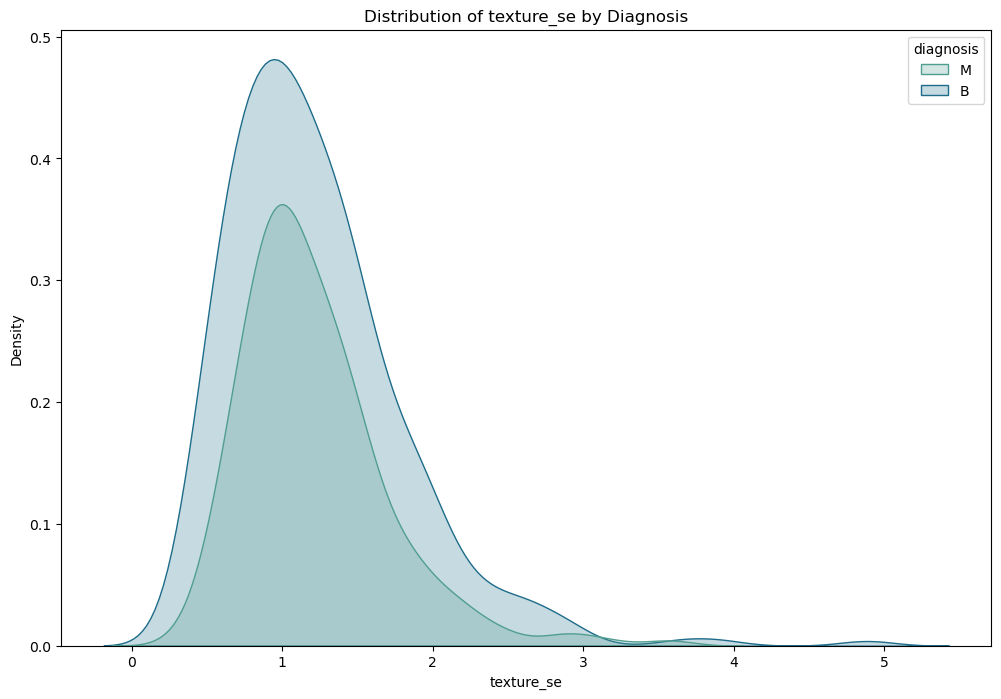

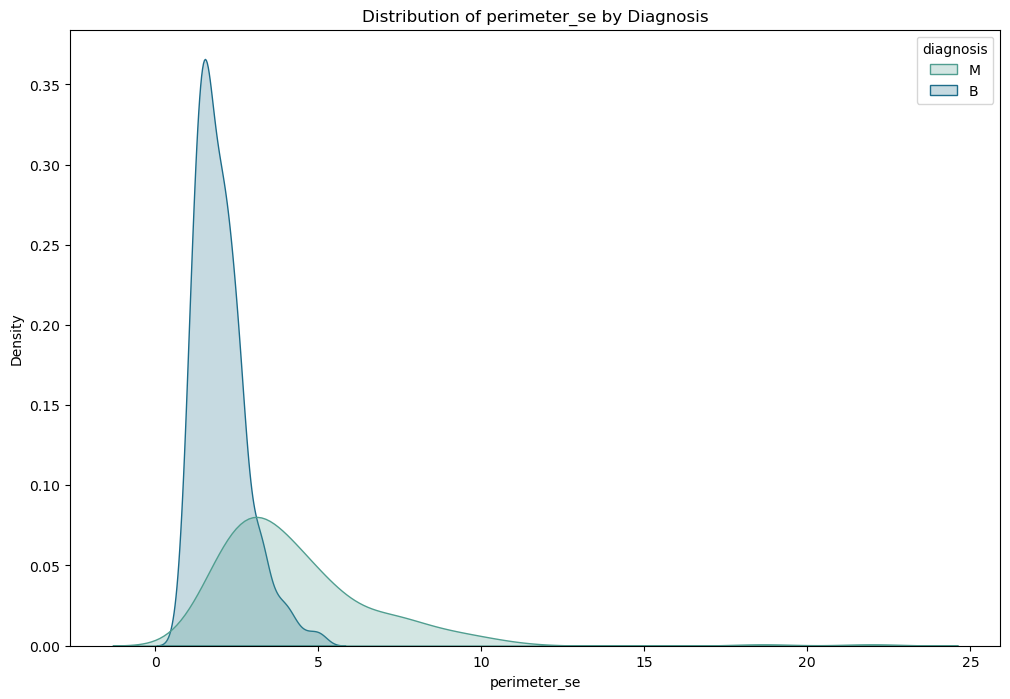

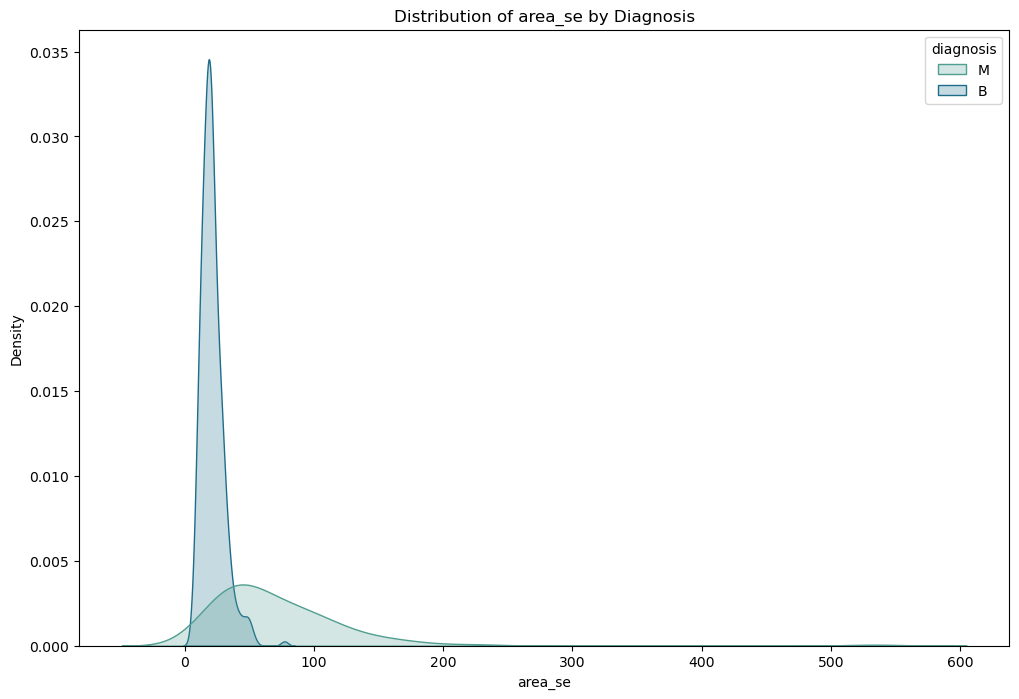

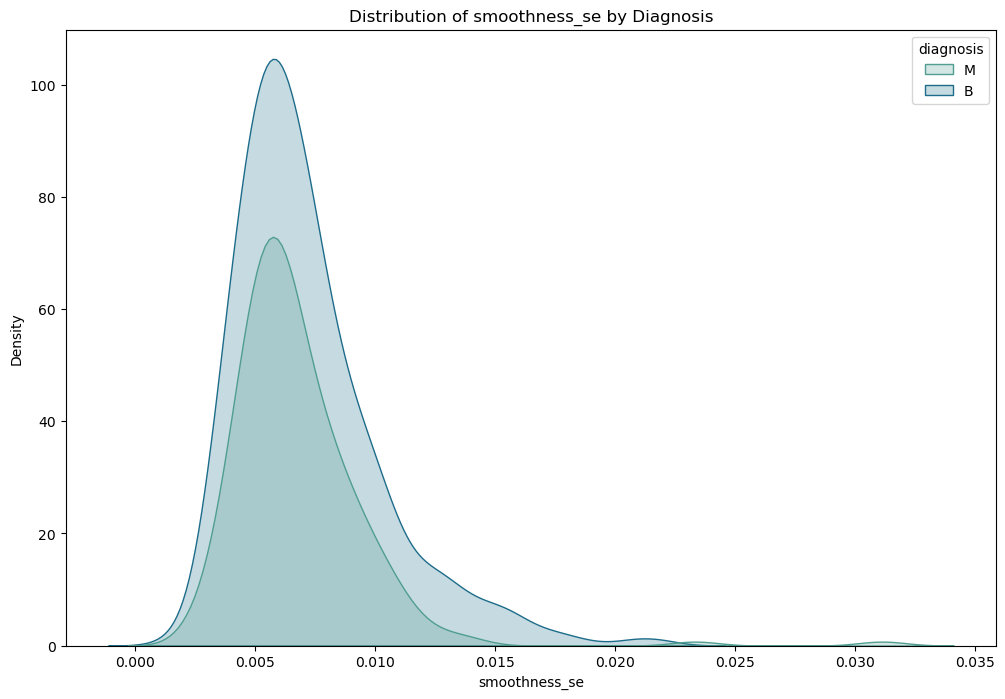

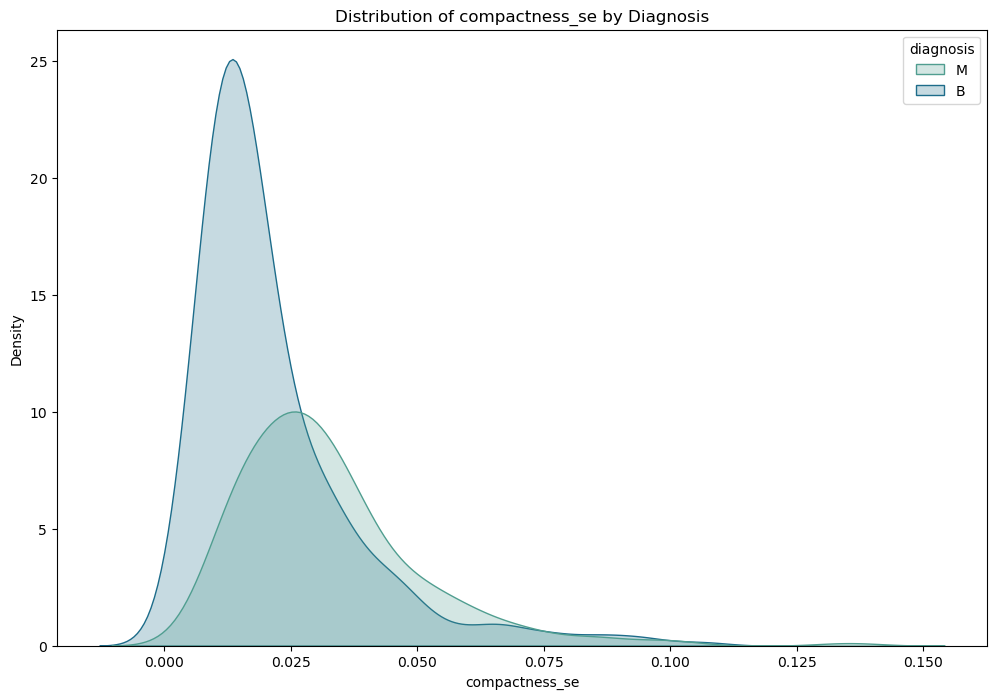

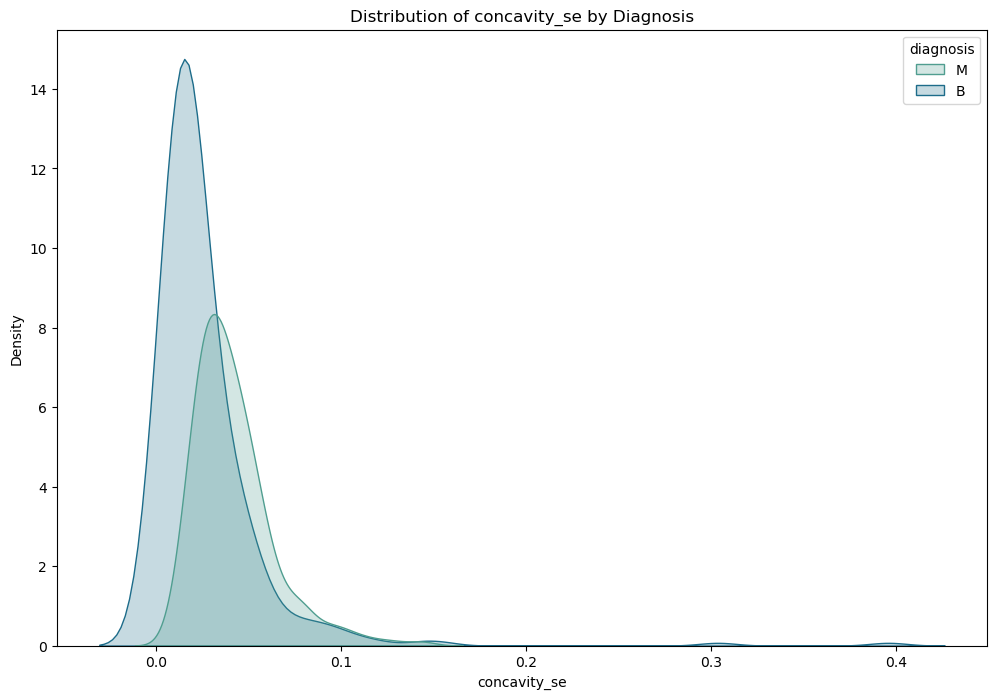

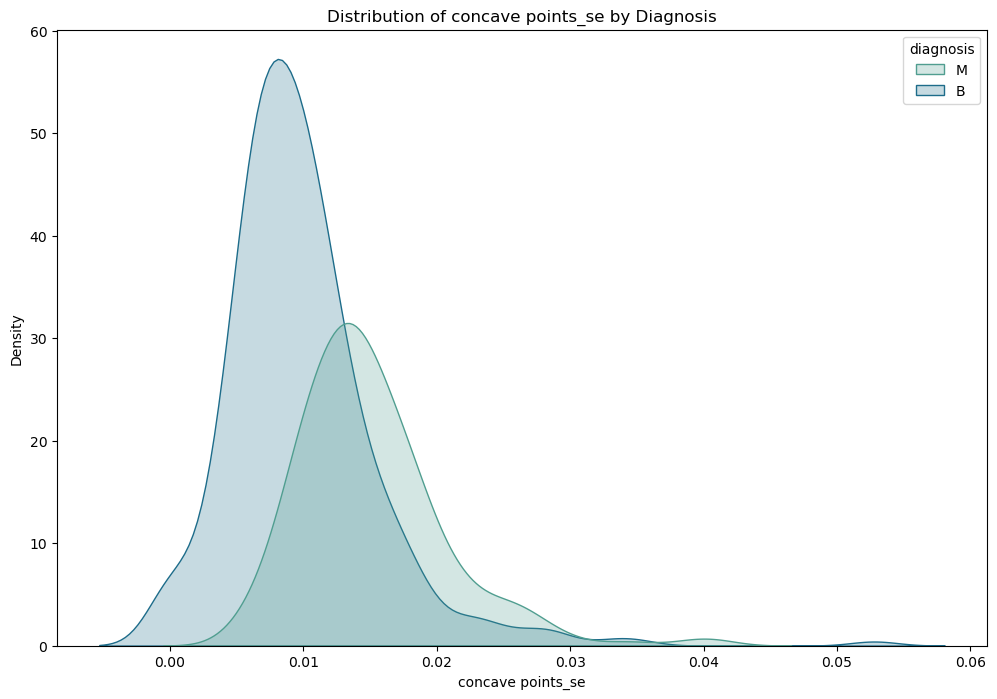

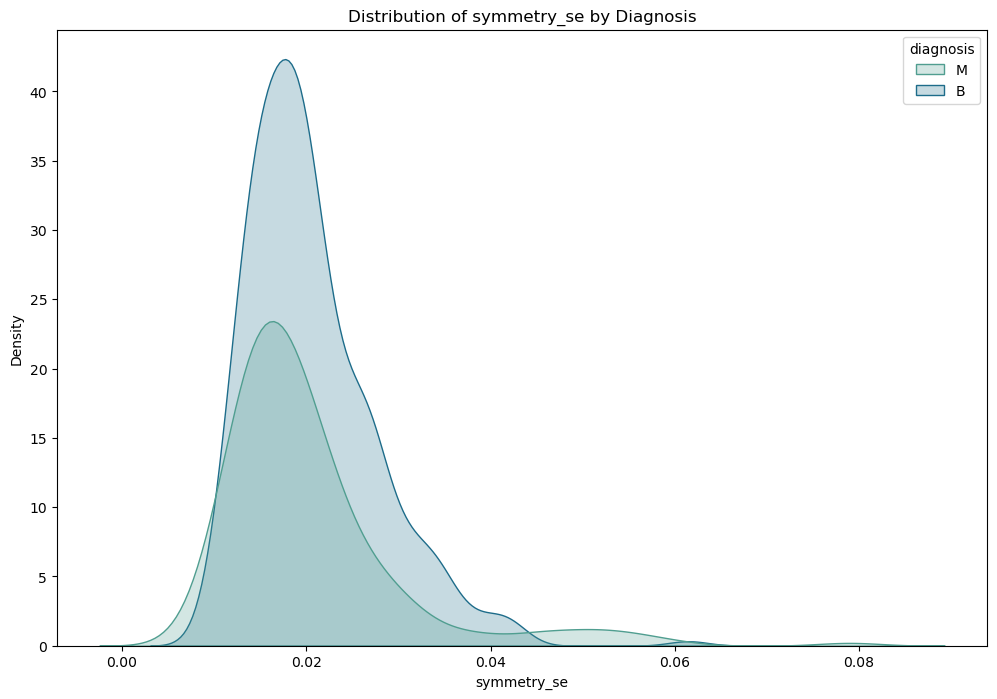

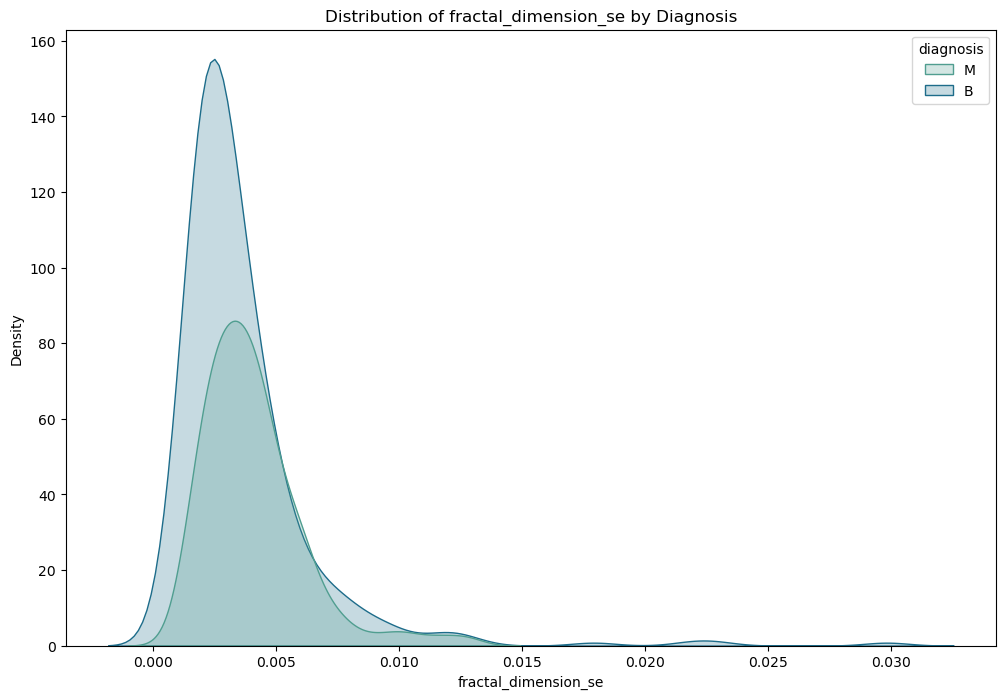

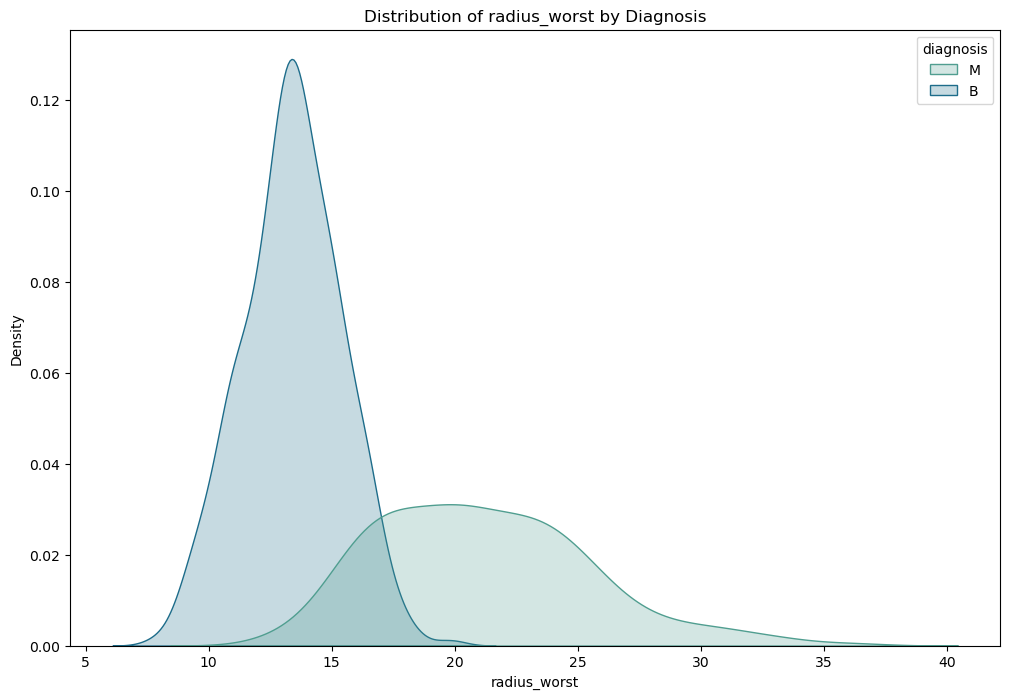

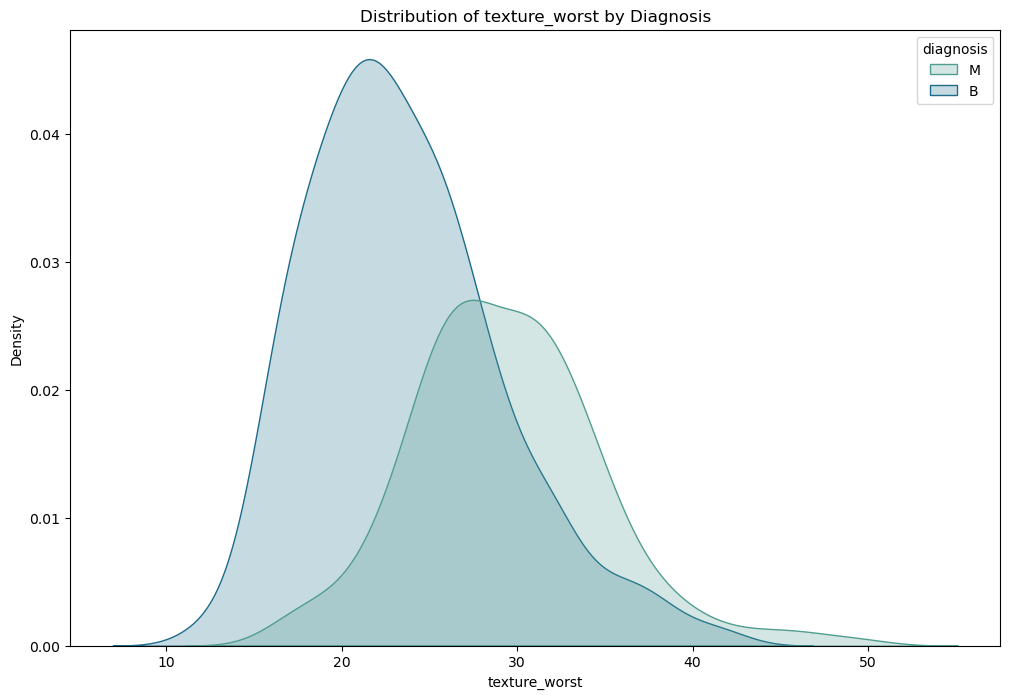

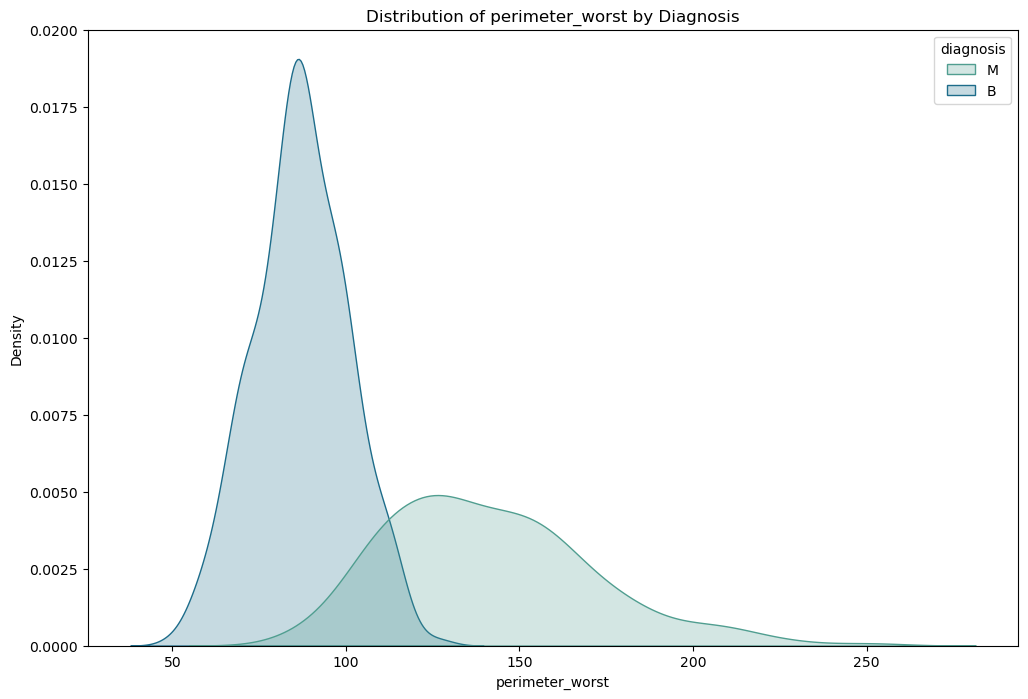

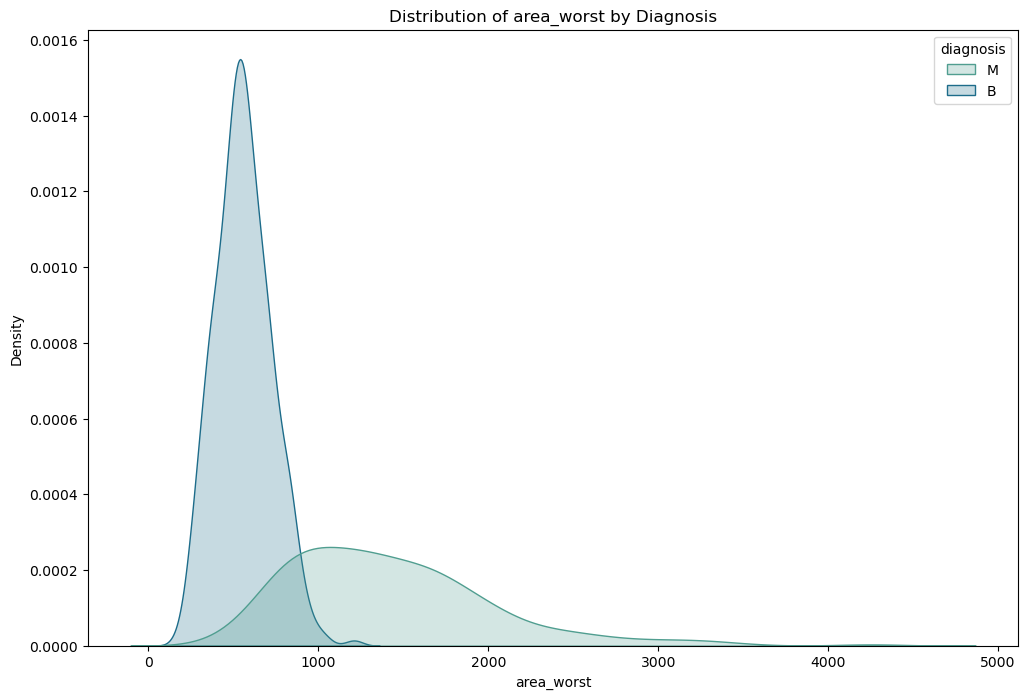

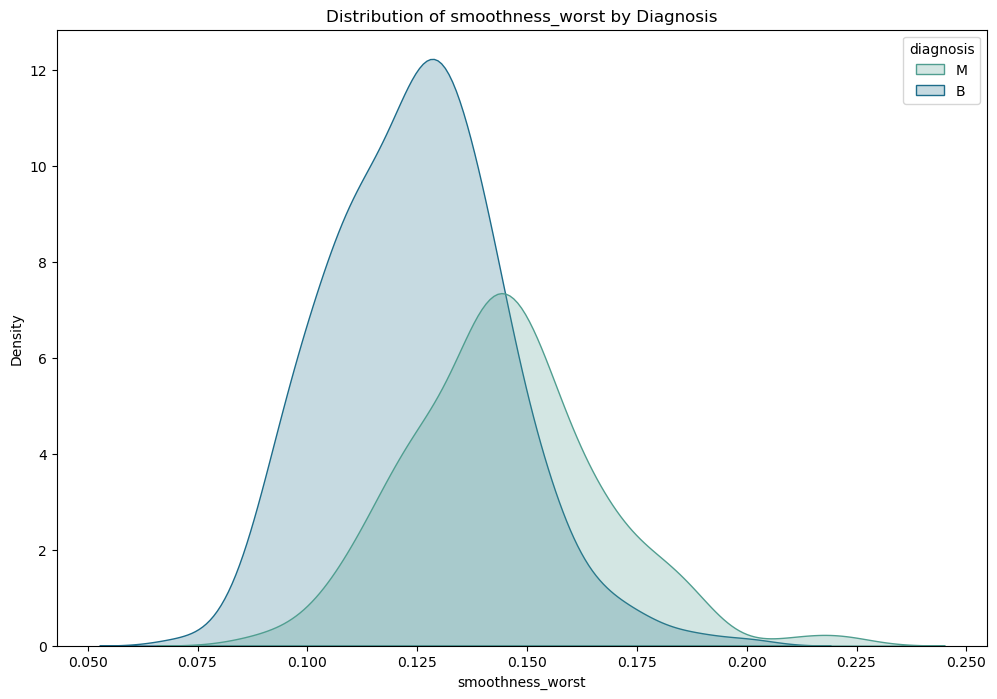

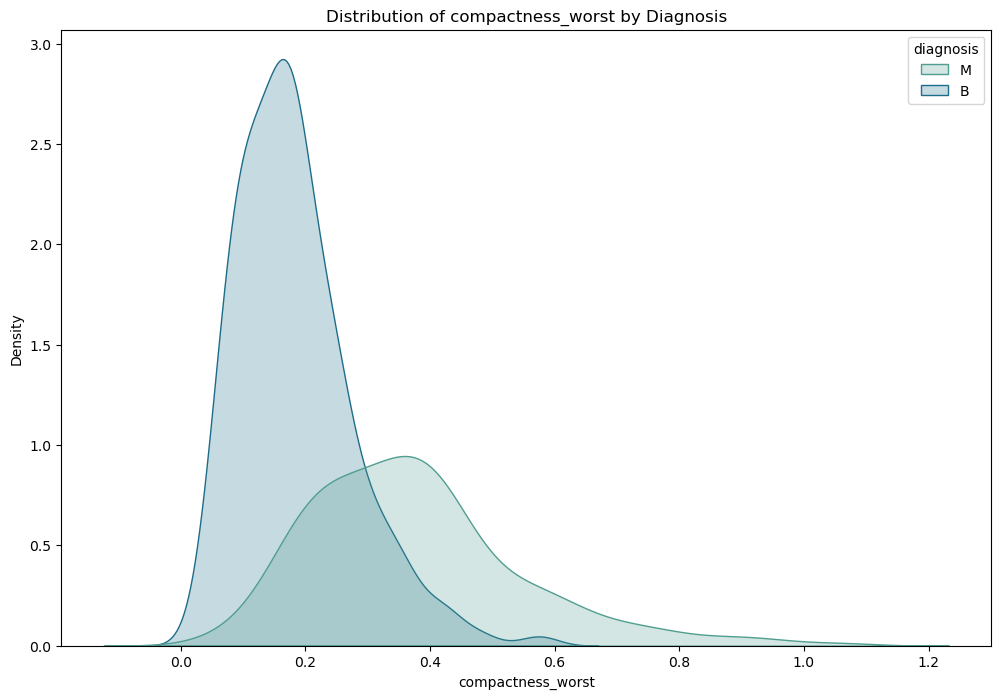

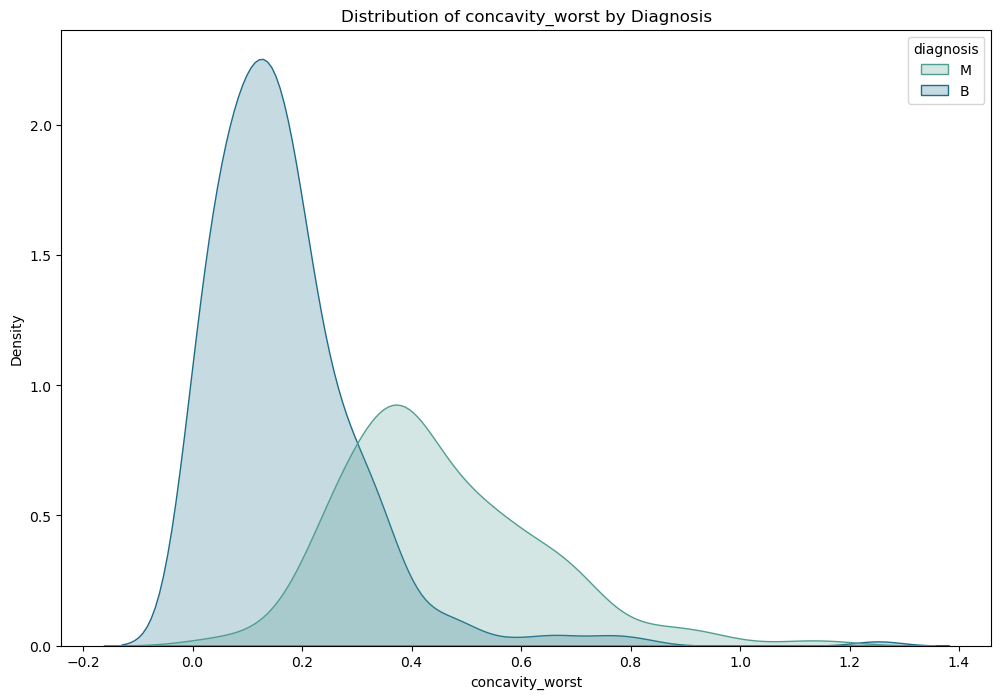

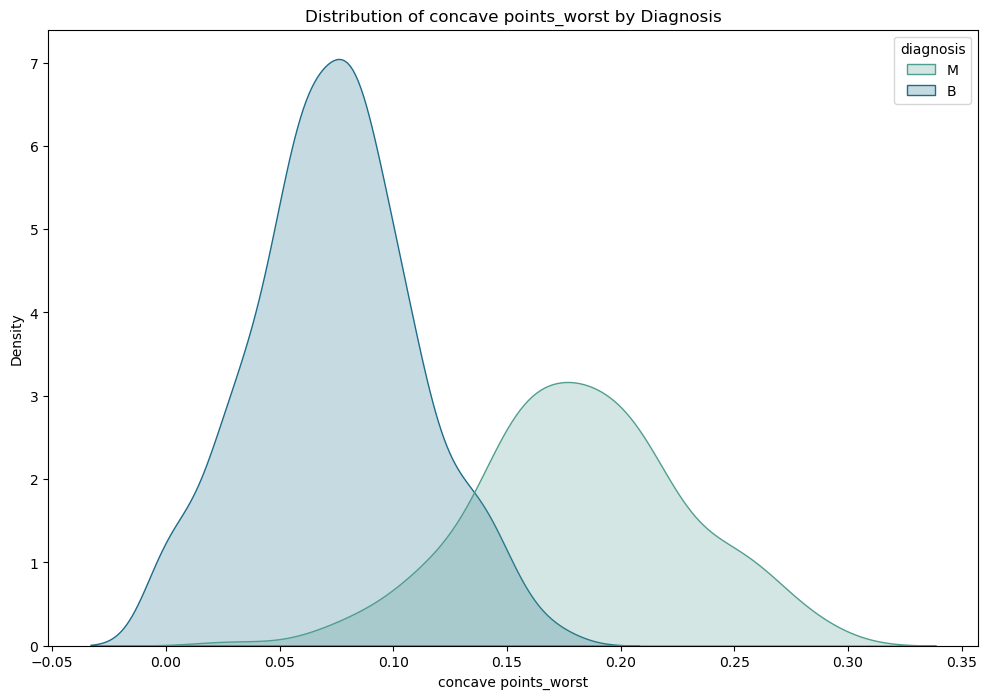

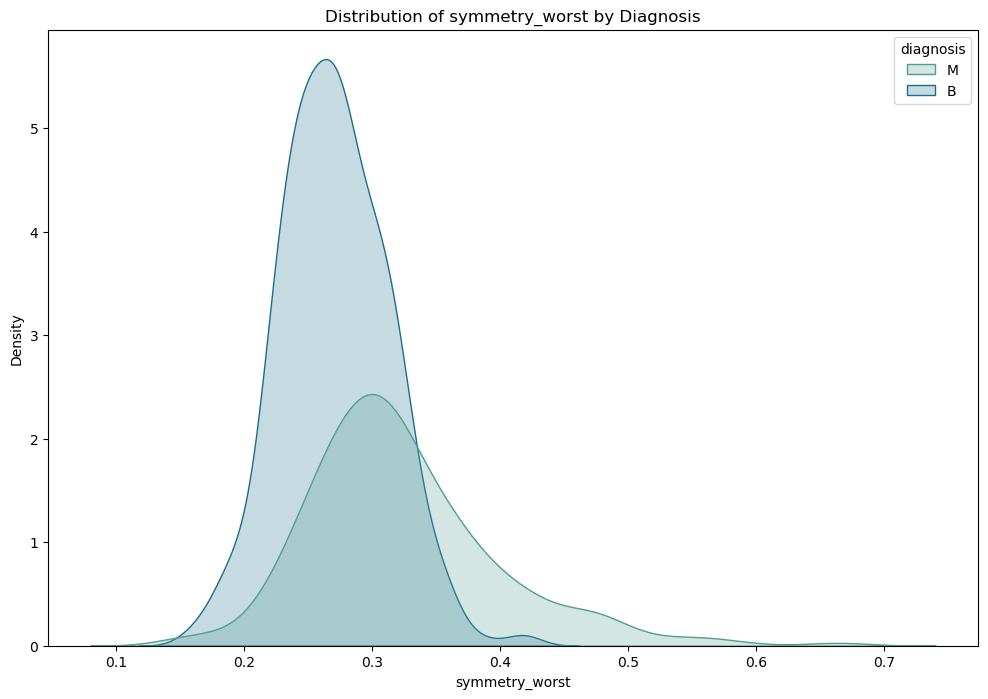

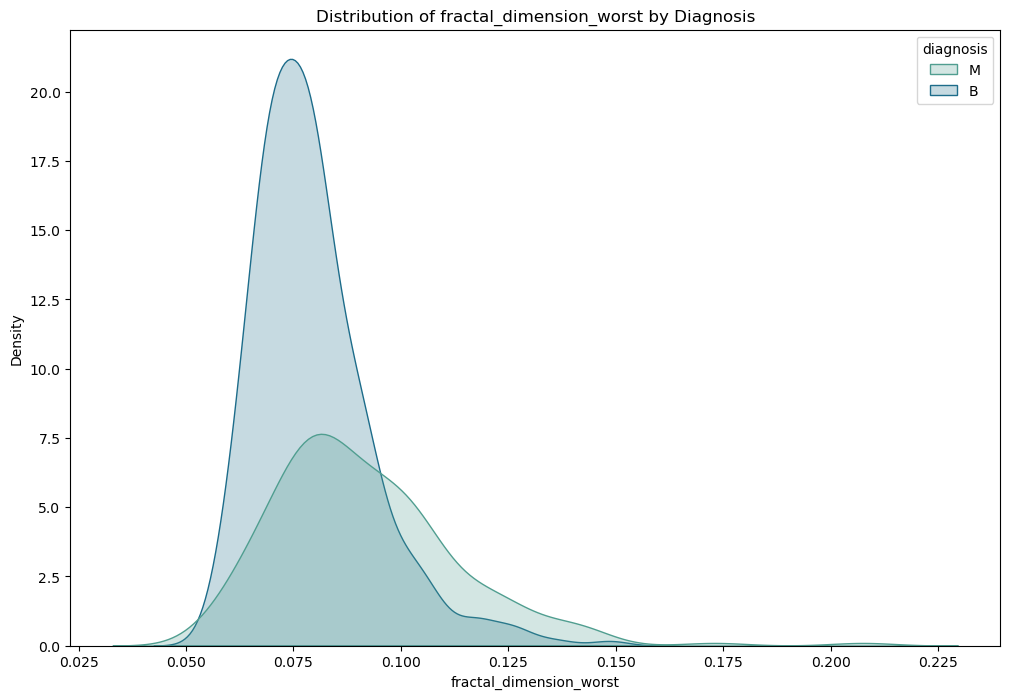

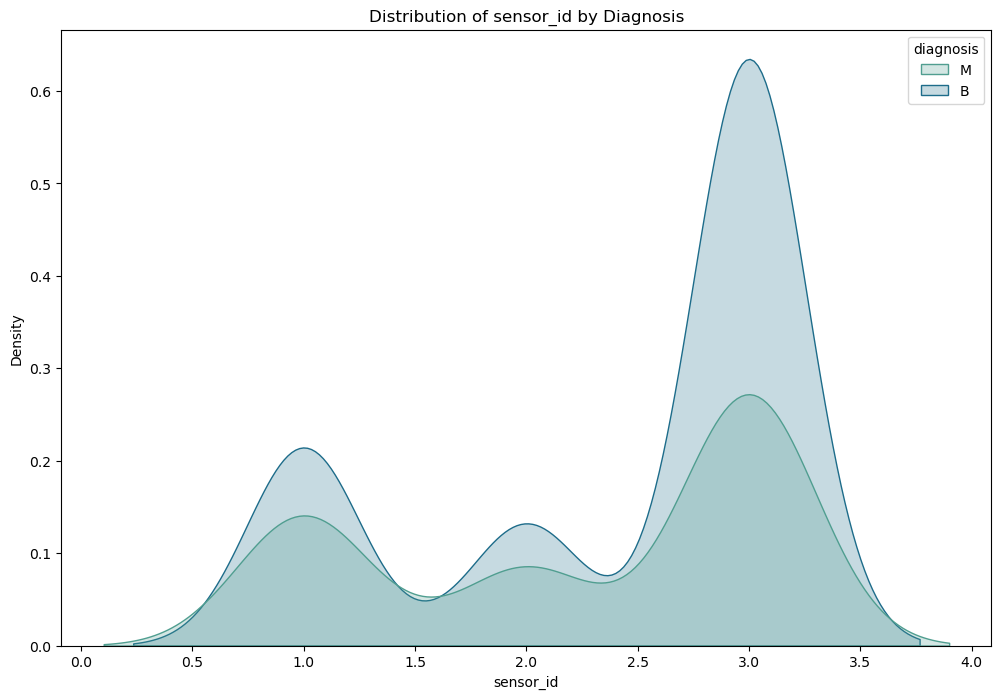

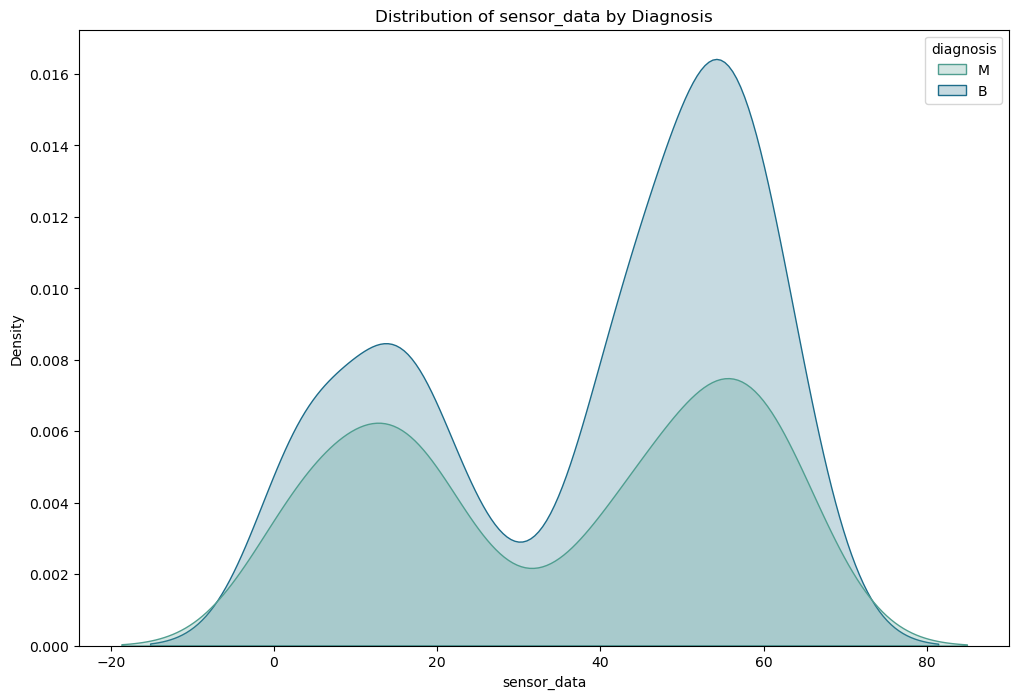

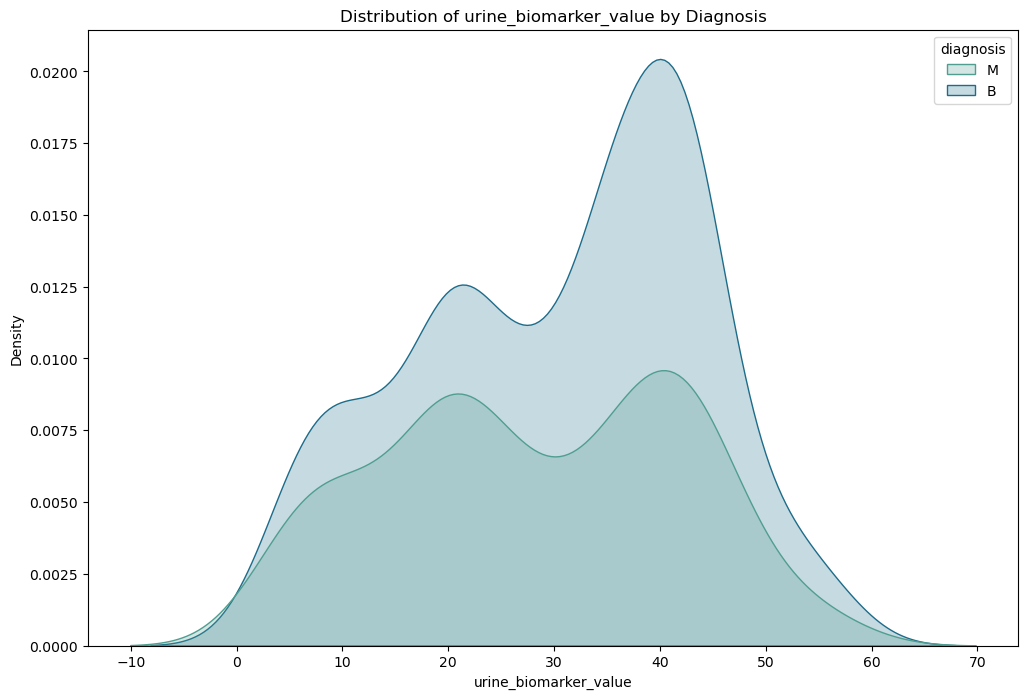

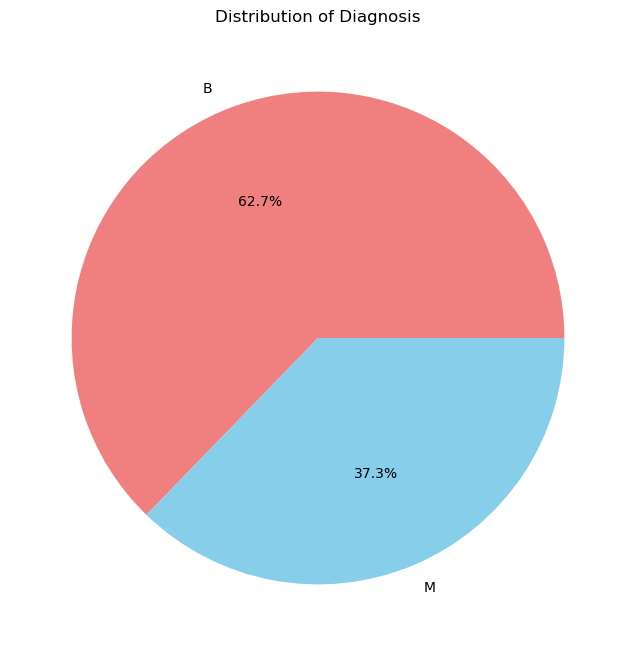

In [34]:
le = LabelEncoder()
project_data['diagnosis_encoded'] = le.fit_transform(project_data['diagnosis'])

# Plot KDEs for numeric features by diagnosis
for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=project_data, x=column, hue='diagnosis', palette="crest", fill=True)
    plt.title(f'Distribution of {column} by Diagnosis')
    plt.show()

# Plotting Pie Chart for Diagnosis
plt.figure(figsize=(8, 8))
plt.pie(project_data['diagnosis'].value_counts(), labels=project_data['diagnosis'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Diagnosis')
plt.show()

In [47]:
print(len(X_train), len(Y_train_encoded))


272 272


In [58]:
df=pd.read_csv('data.csv')

In [59]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,sensor_id,sensor_name,sensor_data,biomarker_name,urine_biomarker_value
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.6656,0.7119,0.2654,0.4601,0.11890,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),20.3
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.1866,0.2416,0.1860,0.2750,0.08902,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),18.9
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.4245,0.4504,0.2430,0.3613,0.08758,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),22.1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.8663,0.6869,0.2575,0.6638,0.17300,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),19.5
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.2050,0.4000,0.1625,0.2364,0.07678,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),45.2
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,0.5249,0.5355,0.1741,0.3985,0.12440,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),50.8
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,0.2576,0.3784,0.1932,0.3063,0.08368,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),55.6
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,0.3682,0.2678,0.1556,0.3196,0.11510,1,NanoSensor1,15.5,Nuclear Matrix Protein 22 (NMP22),48.3
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,0.5401,0.5390,0.2060,0.4378,0.10720,2,NanoSensor2,3.8,Urothelial Tumor Associated Antigen (UroVysion),5.5
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,1.0580,1.1050,0.2210,0.4366,0.20750,2,NanoSensor2,3.8,Urothelial Tumor Associated Antigen (UroVysion),4.2


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
sensor_id                  0
sensor_name                0
sensor_data   

In [62]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,sensor_id,sensor_data,urine_biomarker_value
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,2.367311,36.987346,29.605800
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.847773,21.069023,13.561382
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,1.000000,3.800000,4.200000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,2.000000,15.500000,19.500000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,3.000000,42.200000,31.400000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,3.000000,53.700000,41.300000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,3.000000,62.400000,55.600000


In [63]:
df = df.dropna(axis=1)


In [65]:
df.shape

(569, 37)

In [66]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [67]:
import seaborn as sns

In [69]:
lb=LabelEncoder()

In [72]:
plt.figure(figsize=(25,25))

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

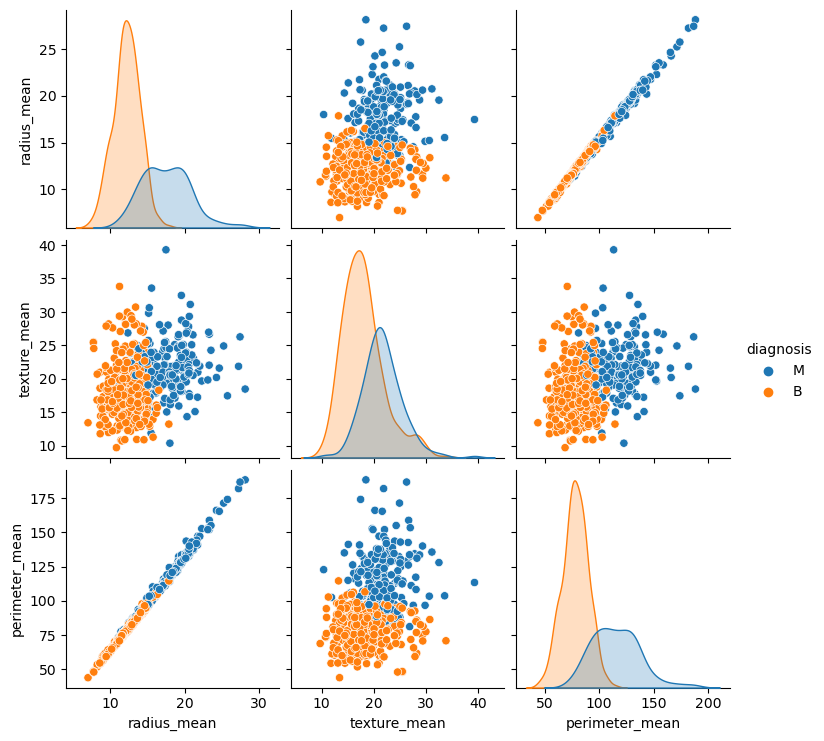

In [73]:
sns.pairplot(df.iloc[:, 1:5], hue="diagnosis")

In [74]:
X=df.iloc[:, 2:32].values

In [75]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [76]:
y = df.iloc[:, 1].values

In [81]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
st  = StandardScaler()


In [82]:
X_train  = st.fit_transform(X_train)
X_test  = st.fit_transform(X_test)

In [83]:
X_train.shape

(455, 30)

In [84]:
y_train.shape

(455,)

In [85]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [86]:
log = LogisticRegression()

In [87]:
log.fit(X_train, y_train)

LogisticRegression()

In [88]:
log.score(X_train, y_train)

0.989010989010989

In [89]:
from sklearn.metrics import accuracy_score, classification_report

In [90]:
accuracy_score(y_test, log.predict(X_test))

0.956140350877193

In [91]:
print(classification_report(y_test, log.predict(X_test)))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        67
           M       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [92]:
import pickle

In [95]:
pickle.dump(log, open("model.pkl", "wb"))